# IS-Lab3 (EN)
Intelligent systems. Task for the laboratory on Radial Basis Function Network training.
# Aim
Learn to write training (parameter estimation) algorithm for the Radial Basis Function Network based approximator's 2nd laye.
# Tasks (maximum 8 points)
1. Create a Radial Basis Function Networks for approximation with:
- single input;
- single output;
- two Gaussian radial basis functions: F = exp(-(x-c)^2/(2*r^2)).
2. Train the RBF network for approximation task for use 20 examples:
- input values are generated using equation x = 0.1: 1/22: 1;
- desired output values are calculated using formula y = (1 + 0.6 \* sin (2 \* pi \* x / 0.7)) + 0.3 \* sin (2 \* pi \* x)) / 2;
- select manually c1, r1 for the first RBF and c2, r2 for the second RBF;
- use perceptron training algorithm for estimating output layer parameters w1, w2, w0.

# Additional task (2 additional points)
Implement any alternative RBF training algorithm, where center positions c1, c2 and radius values r1, r2 are updated during training.

# Suggested reading
- Neural Networks and Learning Machines (3rd Edition), page 54 for main task (or 261-267 for additional task), Table 1.1. 

# IS-Lab3 (LT)
Intelektualiosios sistemos. Trečiojo laboratorinio darbo užduotis.
# Tikslas
Išmokti savarankiškai suprogramuoti paprasto netiesinio aproksimatoriaus, grįsto Spindulio tipo bazinių funkcijų tinklu, mokymo (parametrų skaičiavimo) algoritmą.
# Užduotys (maks. 8 balai)
1. Sukurkite spindulio tipo bazinių funkcijų (SBF) tinklo parametrams apskaičiuoti skirtą programą. SBF turi atlikti aproksimatoriaus funkciją. SBF struktūra:
- vienas įėjimas (įėjime paduodamas 20 skaičių vektorius X, su reikšmėmis intervale nuo 0 iki 1, pvz., x = 0.1:1/22:1; ).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.1, 1, 20)

- vienas išėjimas (pvz., išėjime tikimasi tokio norimo atsako, kurį galima būtų apskaičiuoti pagal formulę: y = (1 + 0.6\*sin(2\*pi\*x/0.7)) + 0.3\*sin(2\*pi\*x))/2; - kuriamas neuronų tinklas turėtų "modeliuoti/imituoti šios formulės elgesį" naudodamas visiškai kitokią matematinę išraišką nei ši);

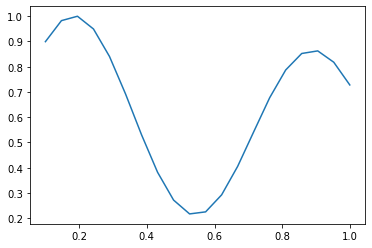

In [5]:
y = (1 + 0.6*np.sin(2*np.pi*x/0.7)) + 0.3*np.sin(2*np.pi*x)/2;
y /= np.max(np.abs(y),axis=0)
plt.plot(x, y)
plt.show()

- dvi spindulio tipo funkcijos (naudokite Gauso funkcijas: F = exp(-(x-c)^2/(2*r^2)));

In [15]:
rbf = lambda x, c, r: np.exp(-1*np.square(x-c)/(2*np.square(r)))

- centrų reikšmes c1 ir c2, spindulių reikšmes r1 ir r2 parinkite rankiniu būdu;

In [81]:
peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
c1 = x[peaks[0]]
c2 = x[peaks[1]]
r1 = 0.15
r2 = 0.18
print('c1: ', c1, 'c2', c2, 'r1', r1, 'r2', r2)

c1:  0.19473684210526315 c2 0.9052631578947369 r1 0.15 r2 0.18


- tiesine aktyvavimo funkcija išėjimo neurone;
- mokymo algoritmas skirtas išėjimo parametrams w1, w2 ir w0 apskaičiuoti - toks pat kaip ir perceptrono mokyme (1 LD).

In [34]:
class Perceptron:
    def __init__(self, learn_rate, x1, x2, y):
        self.w1   = np.random.rand(1)
        self.w2   = np.random.rand(1)
        self.b    = np.random.rand(1)
        self.rate = learn_rate
        self.x1 = x1
        self.x2 = x2
        self.truth = y
        
    def train(self, max_iter):
        self.iter = 0
        self.error = 0
        while self.iter < max_iter:
            for cur in range(len(self.x1)):
                self.out = self.x1[cur] * self.w1 + self.x2[cur] * self.w2 + self.b
                self.error = self.truth[cur] - self.out
                self.w1 = self.w1 + self.rate * self.error * self.x1[cur];
                self.w2 = self.w2 + self.rate * self.error * self.x2[cur];
                self.b = self.b + self.rate * self.error;
            self.out = self.x1 * self.w1 + self.x2 * self.w2 + self.b
            self.error = np.sum(np.abs(self.truth - self.out))
            if self.error == 0:
                break
            self.iter += 1
        print('Finish training ', self.iter)
    
    def predict(self, x1, x2):
        self.out = x1 * self.w1 + x2 * self.w2 + self.b
        return self.out

Finish training  1000


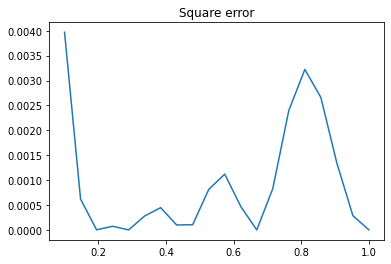

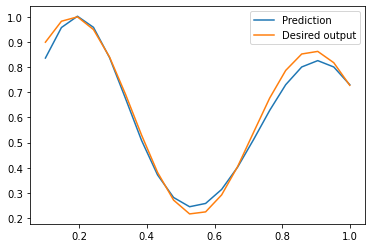

In [80]:
x1_rbf = rbf(x, c1, r1) 
x2_rbf = rbf(x, c2, r2)
perceptron = Perceptron(0.5, x1_rbf, x2_rbf, y)
perceptron.train(1000)
d = perceptron.predict(x1_rbf, x2_rbf)
e = np.square(np.abs(y - d)) 
plt.plot(x, e)
plt.title('Square error')
plt.show()
plt.plot(x, d, label='Prediction')
plt.plot(x, y, label = 'Desired output')
plt.legend()
plt.show()

# Papildoma užduotis (papildomi 2 balai)
Apmokykite SBF tinklą kitu algoritmu, kuris taip pat atnaujina/parenka automatiškai ir centrų c1, c2 bei spindulių r1, r2 reikšmes.
# Rekomenduojama literatūra
- Neural Networks and Learning Machines (3rd Edition), pagrindinei užduočiai užtenka perceptrono parametrų atnaujinimo algoritmo 54 psl., papildomai užduočiai 261-267 psl. pateiktos santraukos k-means + RLS/LMS.